In [1]:
import TraceDisplay as TD
from TraceDisplay import BOKEH_RENDERER
import os
from IPython.core.display import display, HTML

Loading BokehJS ...

In [2]:
# Chose a .tar
path_to_tar = ! find ../trace -name *.tar | grep MONITORING=trace-cmd | head -n 1
path_to_tar = path_to_tar[0]
path_to_tar

'../trace/HOST=ryzen/BENCH=hackbench/CMDLINE=default/GOVERNOR=schedutil/MONITORING=trace-cmd/400-5.4-schedlog-ftraced/1.tar'

In [3]:
# Get its .h5
path_to_h5 = os.path.splitext(path_to_tar[len('../trace/'):])[0] + '.h5'
path_to_dat = os.path.splitext(path_to_h5)[0] + '.dat'
trace = TD.Trace()
if os.path.exists(path_to_h5):
    trace.load(path_to_h5)
else:
    # Extract .dat and convert to .h5
    ! mkdir -p $(! dirname $path_to_dat)
    path_trace_dat_tgz = ! tar tf $path_to_tar | grep trace.dat.tgz | head -n 1
    path_trace_dat_tgz=path_trace_dat_tgz[0]
    path_trace_dat = ! tar -O -xf $path_to_tar $path_trace_dat_tgz | tar ztf - | grep trace.dat | head -n 1
    path_trace_dat = path_trace_dat[0]
    ! tar -O -xf $path_to_tar $path_trace_dat_tgz | tar -O -xzf - $path_trace_dat > $path_to_dat
    trace.load(path_to_dat)
    trace.save(path_to_h5)
    os.remove(path_to_dat)
trace.keys()

['/sched_wake_idle_without_ipi',
 '/sched_wakeup_new',
 '/sched_waking',
 '/sched_process_wait',
 '/sched_process_exec',
 '/sched_wakeup',
 '/sched_rq_size_change',
 '/sched_process_free',
 '/sched_switch',
 '/sched_process_fork',
 '/sched_tick',
 '/sched_migrate_task',
 '/sched_process_exit',
 '/sched_stat_runtime']

In [4]:
sched_rq_size_interval = TD.Shapes_from('TraceDisplay/shape/line/sched_rq_size_interval.py')
sched_rq_size_change   = TD.Shapes_from('TraceDisplay/shape/line/sched_rq_size_change.py')
shapes = sched_rq_size_interval + sched_rq_size_change

In [5]:
image = TD.Image()
image.build(trace, shapes)
ci = TD.ColoredImage(image)
HTML(ci.html_legend())

In [6]:
# Change color[1] and addColor
ci.color_map[1].label = 'sched_rq_size_interval == 0'
ci.color_map[1].query = {'sched_rq_size_interval':'rq_size==0'}
ci.addColor(label='sched_rq_size_interval > 0', query={'sched_rq_size_interval':'rq_size>0'})
ci.applyColor()
HTML(ci.html_legend())

In [7]:
br = TD.BokehRenderer()
br.show()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEJ1dHRvbihkZXNjcmlwdGlvbj11J1J1biBJbnRlcmFjdCcsIHN0eWxlPUJ1dHRvblN0eWxlKCkpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


(60943014894.0, 61264570877.0)
(0, 7.5)


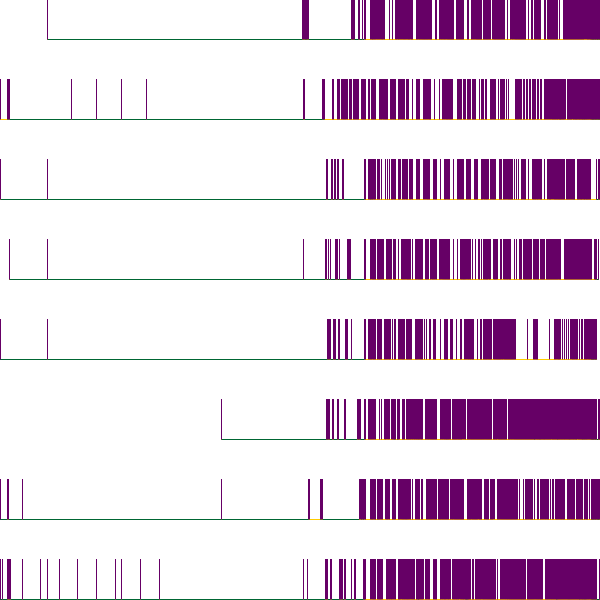

In [8]:
br.render(ci)
display(br.image)